# Informatische Werkzeuge in den Geistes- und Sozialwissenschaften II

## Hausaufgabe 7 (Bildoperationen mit Pillow)

**Erschienen:** 20.06.2020  
**Abgabe bis:** 28.06.2020

Bitte laden Sie Ihre Notebooks bis 23:59 Uhr am Abgabetag in Ihrer Übungsgruppe bei [StudOn](https://www.studon.fau.de) hoch.

Wenn Ihnen einige der hier verwendeten Konzepte unbekannt sind oder Sie nicht wissen, wie Sie fortfahren sollen, können Sie die [Vorlesungsunterlagen](https://kwarc.info/teaching/IWGS/) zu Rate ziehen oder jederzeit Fragen im [Forum](https://www.studon.fau.de/studon/goto.php?target=frm_2920231) oder auf [Slack](https://join.slack.com/t/fauiwgs/shared_invite/enQtODIxNTA0OTA5MjE4LTRmNDBlODVmMTdmZWRkOWM2ODdmYmZmNTI1MTIxMTVjYjc2YWIxMzE0ZWFiYzZhNzMyMzZiMWRlNDJkODUwMDY) stellen, im [Tutorium](https://univis.fau.de/form?__s=2&dsc=anew/lecture_view&lvs=forsch/fokomp/izdihu/iwgstu&anonymous=1&ref=tlecture&sem=2020s&tdir=philos/digita/einfhr&__e=372) nachfragen, oder Ihrem Tutor eine Mail schreiben.

## Aufgabe 7.1 (Pillow, 30 Punkte)

In dieser Übung verwenden wir die Python-Bibliothek Pillow für ein paar grundlegende Bildtransformationen.
Dazu müssen Sie einmalig die Bibliothek bei sich installieren. Zur Erinnerung: Python-Bibliotheken installieren Sie im Terminal mit dem Befehl:

```python
pip3 install --user Pillow
```

In dieser Teilaufgabe schauen wir uns zunächst die Dokumentation von Pillow an. Diese finden Sie hier: https://pillow.readthedocs.io/en/stable/index.html

In der nächsten Zelle finden Sie den Code, der auch in der Vorlesung besprochen wurde. Dieser öffnet ein Bild und zeigt es an.
Pillow-Bilder haben eine Methode `.show()`, mit der man Bilder anzeigen kann. Normalerweise öffnet diese Funktion ein neues Fenster, in dem das Bild erscheint.
In Jupyter-Notebooks funktioniert dies nicht.
Eine funktionierende Alternative in Notebooks ist, einfach den Variablennamen zu schreiben. Jupyter öffnet das Bild dann in einer neuen Zelle.
Führen Sie die Zelle aus und stellen Sie sicher, dass das Bild korrekt angezeigt wird.

**Aufgabe:** Wichtige Bildoperationen, die von Pillow unterstützt werden, sind hier zu finden: https://pillow.readthedocs.io/en/stable/reference/ImageOps.html

Schreiben Sie in der nächsten Zelle eine Python-Funktion `image_transformation`. Die Funktion soll als Argumente ein Pillow-Image `img` und einen String `op` bekommen.
`op` beschreibt hier die gewünschte Operation, die Ihre Funktion auf das übergebene Bild anwenden soll. Die Funktion soll danach das Ergebnis zurückgeben.

Mögliche Werte für `op` sind:

- "gray": Umwandlung nach Grayscale
- "invert": Invertieren des Bildes
- "flip_vert": Vertikal spiegeln
- "flip_hori": Horizontal spiegeln
- "poster": Posterisierung. Verwenden Sie hier 3 Bits für die Umwandlung.
- Wenn nichts von den Werten oben, geben Sie `None` zurück.

Testen Sie Ihre Funktion gründlich. Transformieren Sie in der Zelle das Bild `image` mit Hilfe Ihrer Funktion und zeigen Sie es an, um es zu testen.



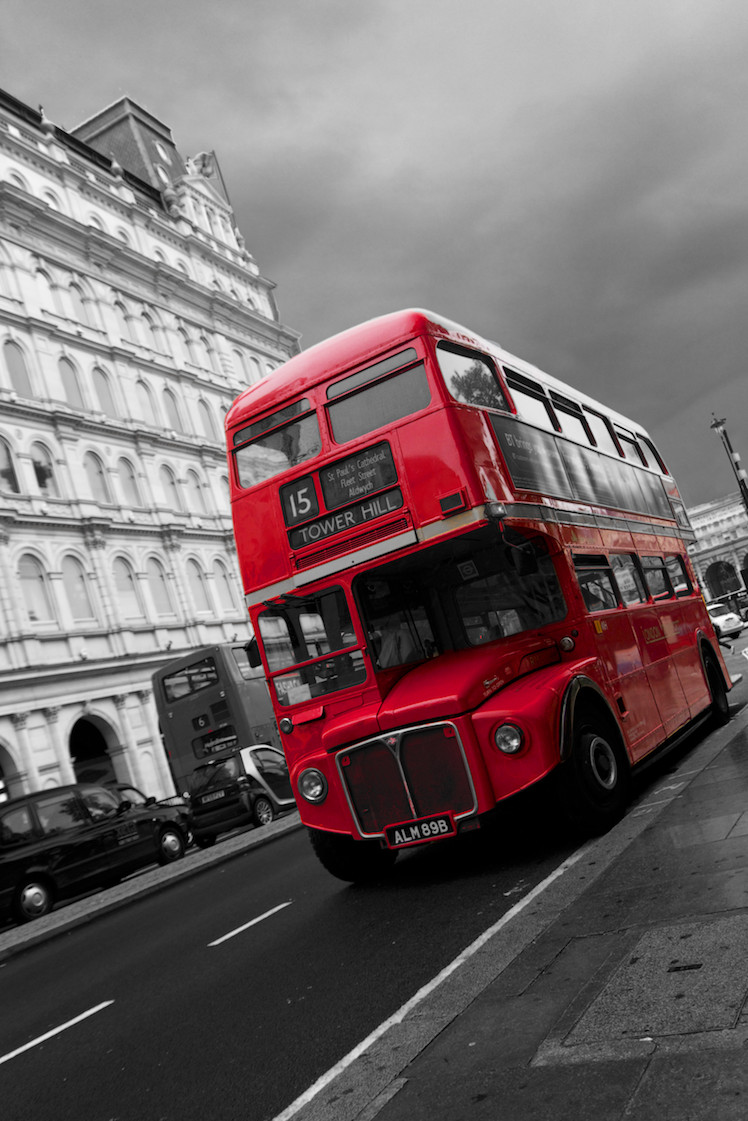

In [1]:
from PIL import Image, ImageOps

# Ihr Code hier.
image = Image.open("bus.jpg")
image

## Aufgabe 7.2 (Thumbnails, 30 Punkte)

Ein Thumbnail ist eine kleinere Version eines Bildes, die oft als Vorschaubild verwendet wird. Beispielsweise wird auf der Startseite von YouTube für jedes Video ein Thumbnail angezeigt, als Vorschau für BesucherInnen.

**Aufgabe:** Schreiben Sie in der nächsten Zelle eine weitere Funktion `create_thumbnail`, die ein Bild und eine Zahl `targetWidth` übergeben bekommt.
Verwenden Sie dann die Pillow-Funktionalität [ImageOps.fit](https://pillow.readthedocs.io/en/stable/reference/ImageOps.html#PIL.ImageOps.fit), um das übergebene Bild auf die entsprechende Größe zu skalieren.

Sie müssen der `fit`-Funktion sowohl eine Breite, als auch eine Höhe übergeben. Die Breite ist schon gegeben in `targetWidth`. Sie müssen also noch eine Höhe berechnen.
Dabei soll das Seitenverhältnis des Bildes nicht verändert werden. Berechnen Sie also in Ihrer Funktion eine Variable `targetHeight`:
```python
targetHeight = int((img.height / img.width) * targetWidth)   # Dreisatz
```

Geben Sie das skalierte Bild zurück. Testen Sie auch diese Funktion. Das Bild sollte kleiner werden, wenn Sie beispielsweise als `targetWidth` 200 übergeben.


In [2]:
# Ihr Code hier.

## Aufgabe 7.3 (Bild-Upload, 40 + 10 Punkte)

Malte Museumsdirektor klingt aufgeregt am Telefon. Offenbar hat das Museum schon seit Wochen vorgehabt, eine große Menge Bilder in die Datenbank hochzuladen.
Allerdings kennt sich keiner der Mitarbeiter gut genug mit CSV aus, um die Daten direkt dort einzutragen. Jetzt ist die Deadline fast erreicht und es muss schnell eine Lösung her!
Malte ist begeistert von Ihrer bisherigen Arbeit und dem Formular, mit welchem man direkt auf der Webseite neue Einträge erstellen kann. "Das spart uns Wochen an Arbeit!", sagt er immer wieder.
Jetzt fehlt nur noch eine Sache: "Wir müssen auch noch Bilder direkt über das Formular hochladen können!"

Können Sie Malte helfen?


---



Wie in der Vorlesung besprochen, kommen Bilder normalerweise in zwei Versionen: komprimiert und unkomprimiert.
Da komprimierte Bilder wesentlich weniger Speicher brauchen , verwenden wir sie typischerweise, wenn wir sie auf der Festplatte speichern wollen (.jpg, .png, etc), oder wenn wir sie über das Internet verschicken wollen. Bilder im Internet werden sehr oft im JPEG-Format übertragen.

Zum Bearbeiten dekomprimieren wir sie dann, führen Operationen auf ihnen aus (wie zB die Operationen oben) und am Ende speichern wir sie wieder komprimiert.
Die Pillow-Funktion `Image.open` von oben führt automatisch eine Dekompression aus, wenn wir Bilder öffnen. Gleichermaßen haben Pillow-Bilder eine Methode `save`: https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.save. Save führt automatisch eine Kompression aus.

Hinweis: `save` ist eine Methode und wird somit direkt auf dem Bild aufgerufen: `img.save(DATEINAME.jpg)`. In diesem Beispiel würde `save` eine JPEG-Kompression auf das Bild anwenden, weil die Dateiendung .jpg ist.

In dieser Teilaufgabe geben wir NutzerInnen unserer Webseite die Möglichkeit, Bilder hochzuladen.
Dazu wird das Formular in _add.tpl_ zum Einfügen neuer Einträge etwas erweitert (schon vorgegeben):

```html
<form action="/finish_add" method="post" enctype="multipart/form-data">
    ...
    
    Image:
    <input type='file' name="image" accept='.jpg, .jpeg'>
    
    ...
</form>
```
Damit erscheint in dem Formular ein Dialog zur Auswahl von Dateien. Fürs erste unterstützen wir hier nur JPEG-komprimierte Bilder (siehe das _accept_-Attribut).
Im `<form>`-Tag ergänzen wir außerdem den _enctype_, sodass wir auch binäre Daten (Bilder) übertragen können.

Das Bild wird somit mit dem POST-Request an den Server übertragen. Hierbei ist wichtig, dass das Bild automatisch komprimiert übertragen wird, um Bandbreite zu sparen!
Wenn wir also auf Serverseite auf dem Bild Operationen durchführen wollen, müssen wir es zunächst dekomprimieren.

Mit dieser Aufgabe kommt eine weitere Python-Datei _image_helper.py_, die ein paar Funktionalitäten anbietet:
- `decompress_image(blob)`: Die Funktion nimmt einen binären "Blob", zum Beispiel das was über den POST-Request übertragen wird und gibt ein Pillow-Bild zurück.
- `compress_image(img)`: Diese Funktion macht genau das Gegenteil. Sie nimmt ein Pillow-Bild und komprimiert es zu einem binären Blob.

Das Skript _image_server.py_ importiert ganz oben die beiden Funktionen, sodass wir sie dort verwenden können.

Zur Erinnerung: Die Bilder sind in unserer Datenbank nicht direkt in der _images.db_-Datei gespeichert, sondern extern im _data_-Ordner. In der Datenbank speichern wir dann nur den Dateinamen.
Wir müssen, wenn wir hochgeladenene Bilder auf dem Server speichern, diesen somit einen neuen Dateinamen zuordnen. Wir können das Bild aber nicht einfach in beispielsweise "bild.jpg" speichern, weil es dann beim nächsten Mal, wenn jemand etwas hochlädt, überschrieben werden würde. Wir müssen also jedes Mal einen neuen, einzigartigen Dateinamen generieren. Beim nächsten Upload wird dann ein neuer Name generiert, sodass andere Bilder nicht überschrieben werden.

_image_helper.py_ bietet deshalb noch eine letzte Funktionalität `unique_jpg_filename()`. Diese Funktion gibt einen neuen Dateinamen zurück, der immer neu generiert wird. Wenn wir die Funktion also mehrmals aufrufen, wird jedes mal ein neuer Name zurückgegeben. Der Dateiname hat dabei schon die Dateiendung `.jpg`.

**Aufgabe:** Ergänzen Sie die Route `/finish_add` in _image_server.py_. Verwenden Sie die die bereitgestellte Funktionalität, um das übertragene Bild in ein Pillow-Bild zu dekomprimieren.
Erstellen Sie dann einen neuen Dateinamen und speichern Sie das Pillow-Bild unter diesem Namen. 

Unsere Bilder sind außerdem im _data_-Ordner gespeichert. Hängen Sie also beim Speichern noch den entsprechenden Pfad vor den Dateinamen.

Als letztes fügt die Route `/finish_add` noch den entsprechenden Dateinamen in die Datenbank ein. Stellen Sie also sicher, dass der richtige Dateiname eingefügt wird.

Denken Sie daran, wieder Ihren Port zu ändern. Testen Sie dann Ihre Funktion. Erstellen Sie auf der Webseite einen neuen Eintrag und laden Sie eine Bilddatei hoch.
Wird der Eintrag richtig in die Tabelle aufgenommen? Wenn Sie auf "Link" klicken, wird dann das richtige Bild angezeigt?



**Bonusfrage (10 Punkte):** Wir wandeln in dieser Teilaufgabe das übertragene Bild erst in ein Pillow-Bild um und speichern dieses dann auf die Festplatte. Warum ist diese Art, das Bild zu speichern nicht optimal, was die Bildqualität angeht? Was wäre besser?
